# MTA Traffic Forecasting
Khyatee Desai & Justin Morgan
# Part 3: Exploratory Data Analysis
This notebook includes data exploration and analysis

### Import Libraries

In [29]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import geopandas as gpd
import contextily as ctx

### Import Shapefiles

In [30]:
station_gdf = gpd.read_file('./shp/station_gdf.shp')
modzcta_gdf = gpd.read_file('./shp/modzcta_gdf.shp')
ct_gdf = gpd.read_file('./shp/ct_gdf.shp')

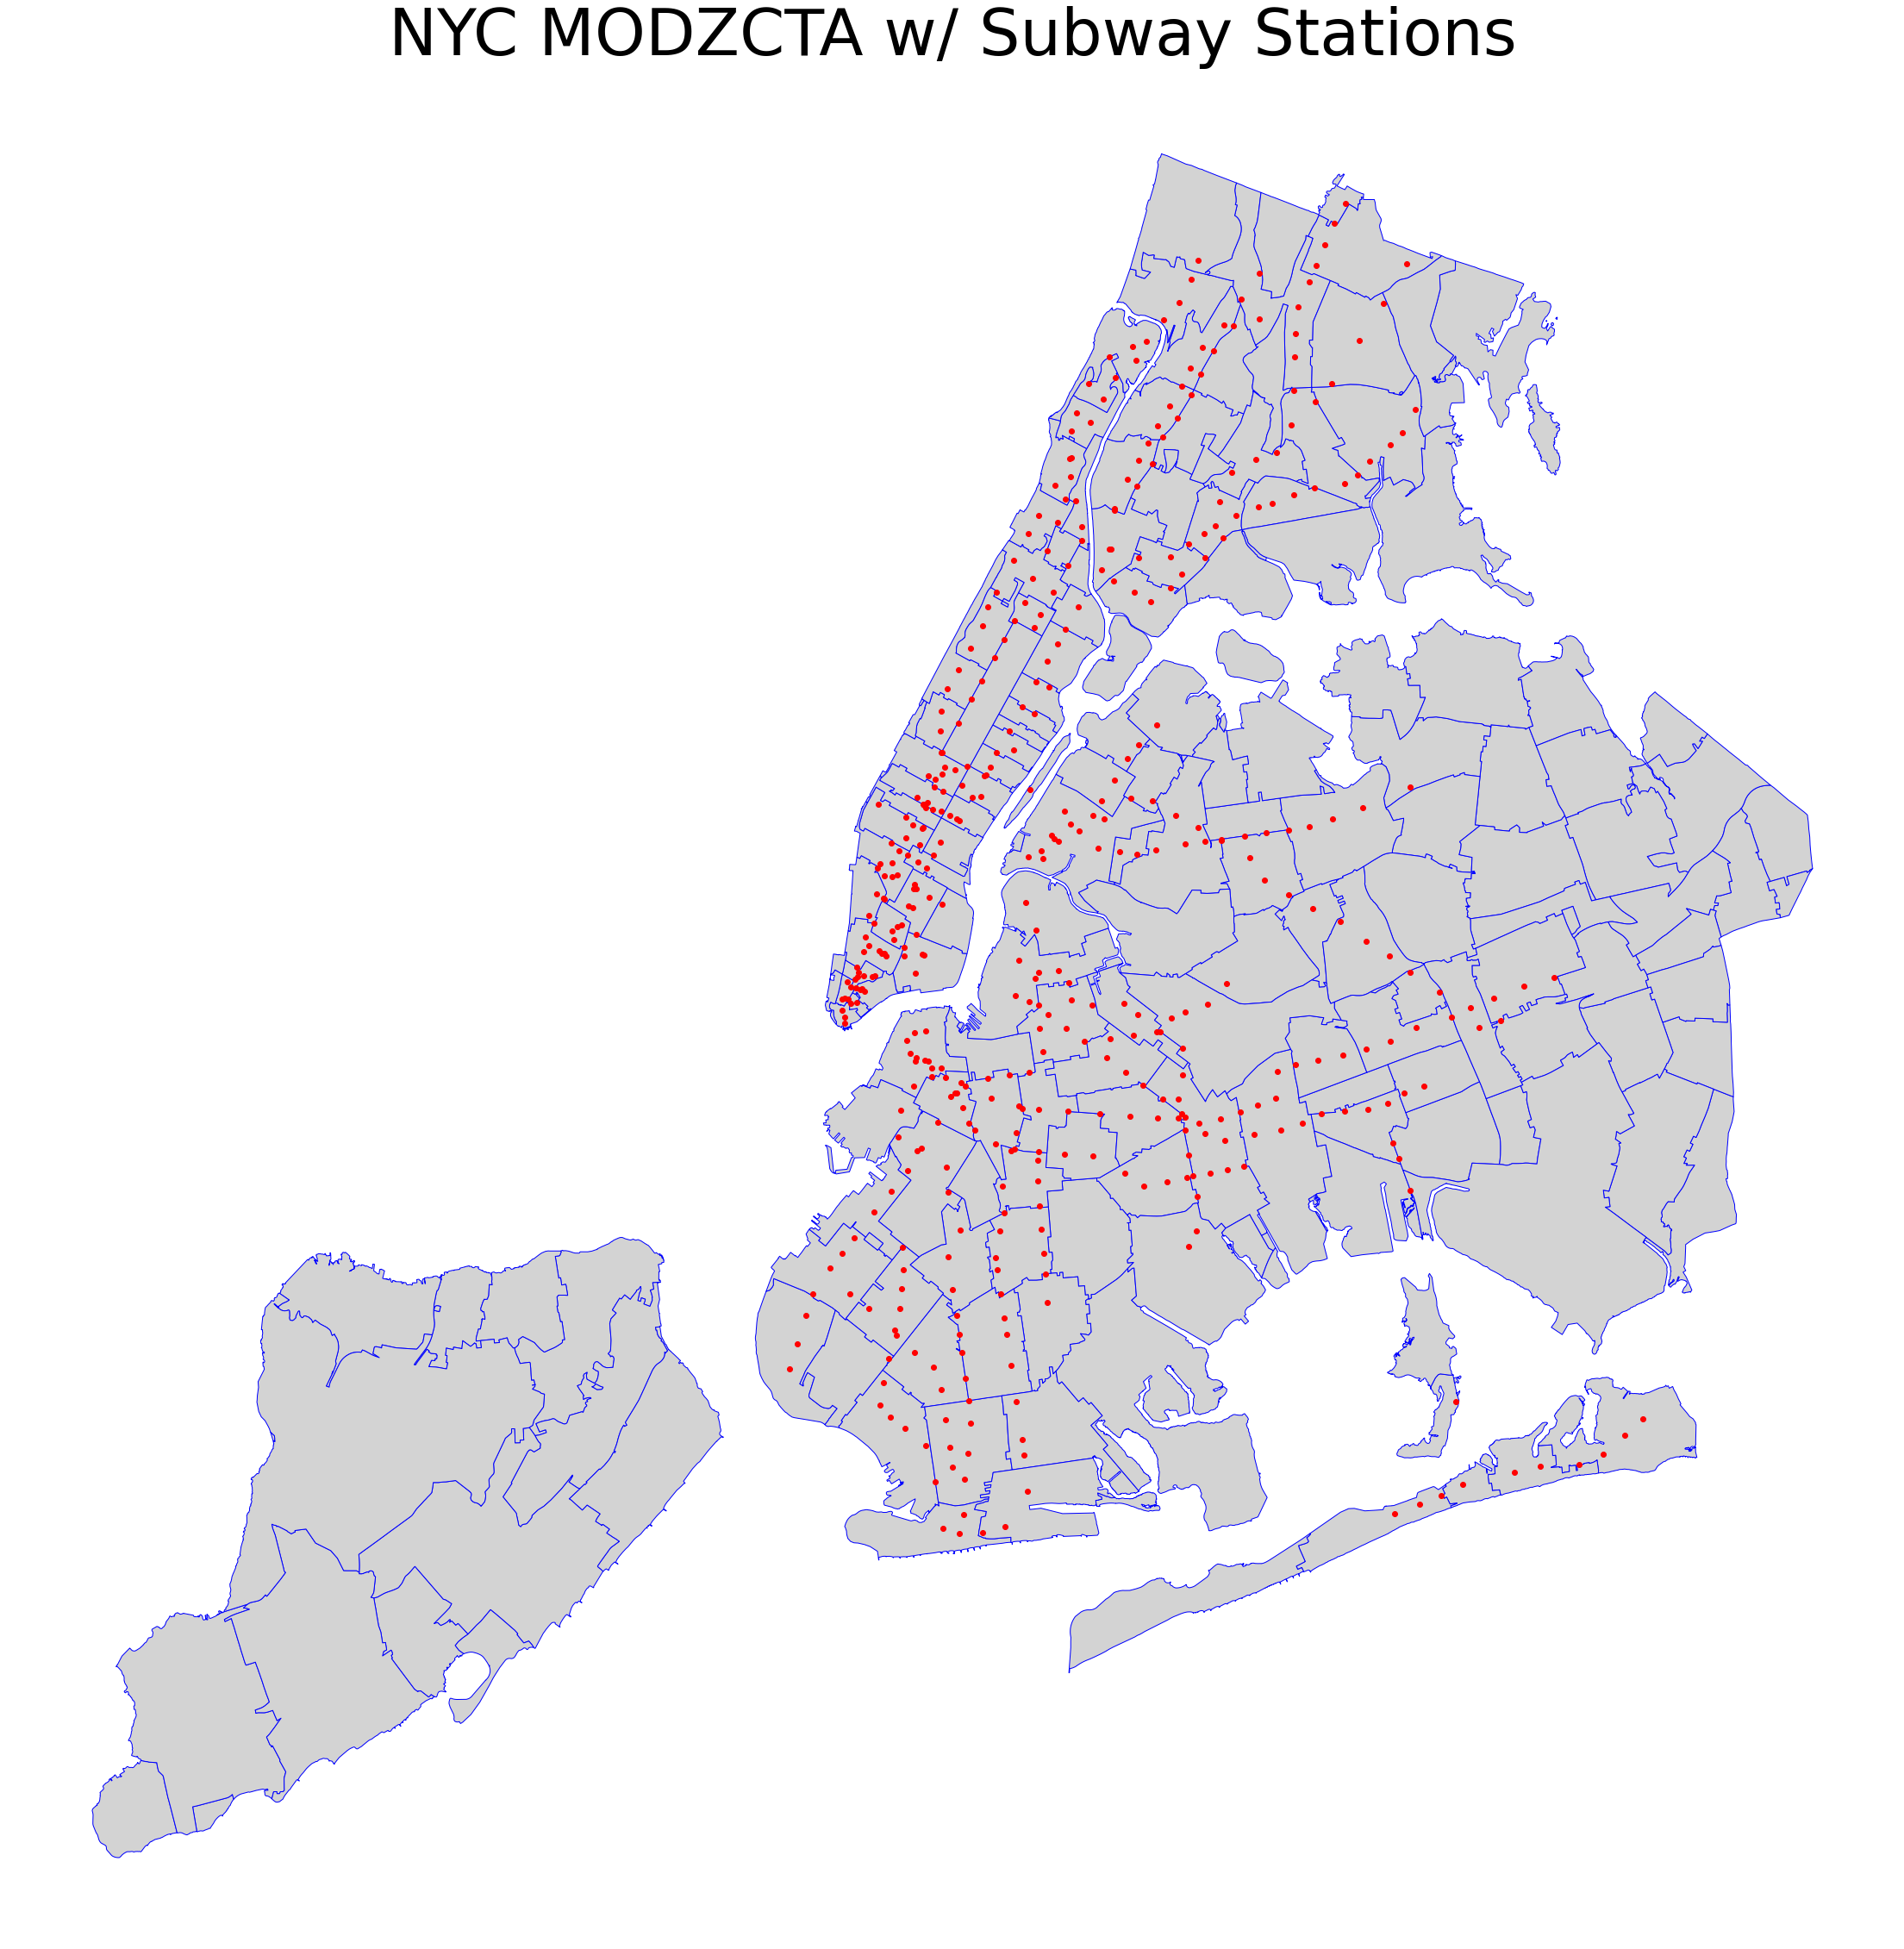

In [37]:
fig, ax = plt.subplots(figsize=(50,40))
ax = modzcta_gdf.plot(ax=ax, color='lightgray', edgecolor='b')
ax = station_gdf.plot(ax=ax, color='r')
ax.set_title(label="NYC MODZCTA w/ Subway Stations", fontdict={'fontsize':75}, loc='center')
ax.set_axis_off()
plt.show()


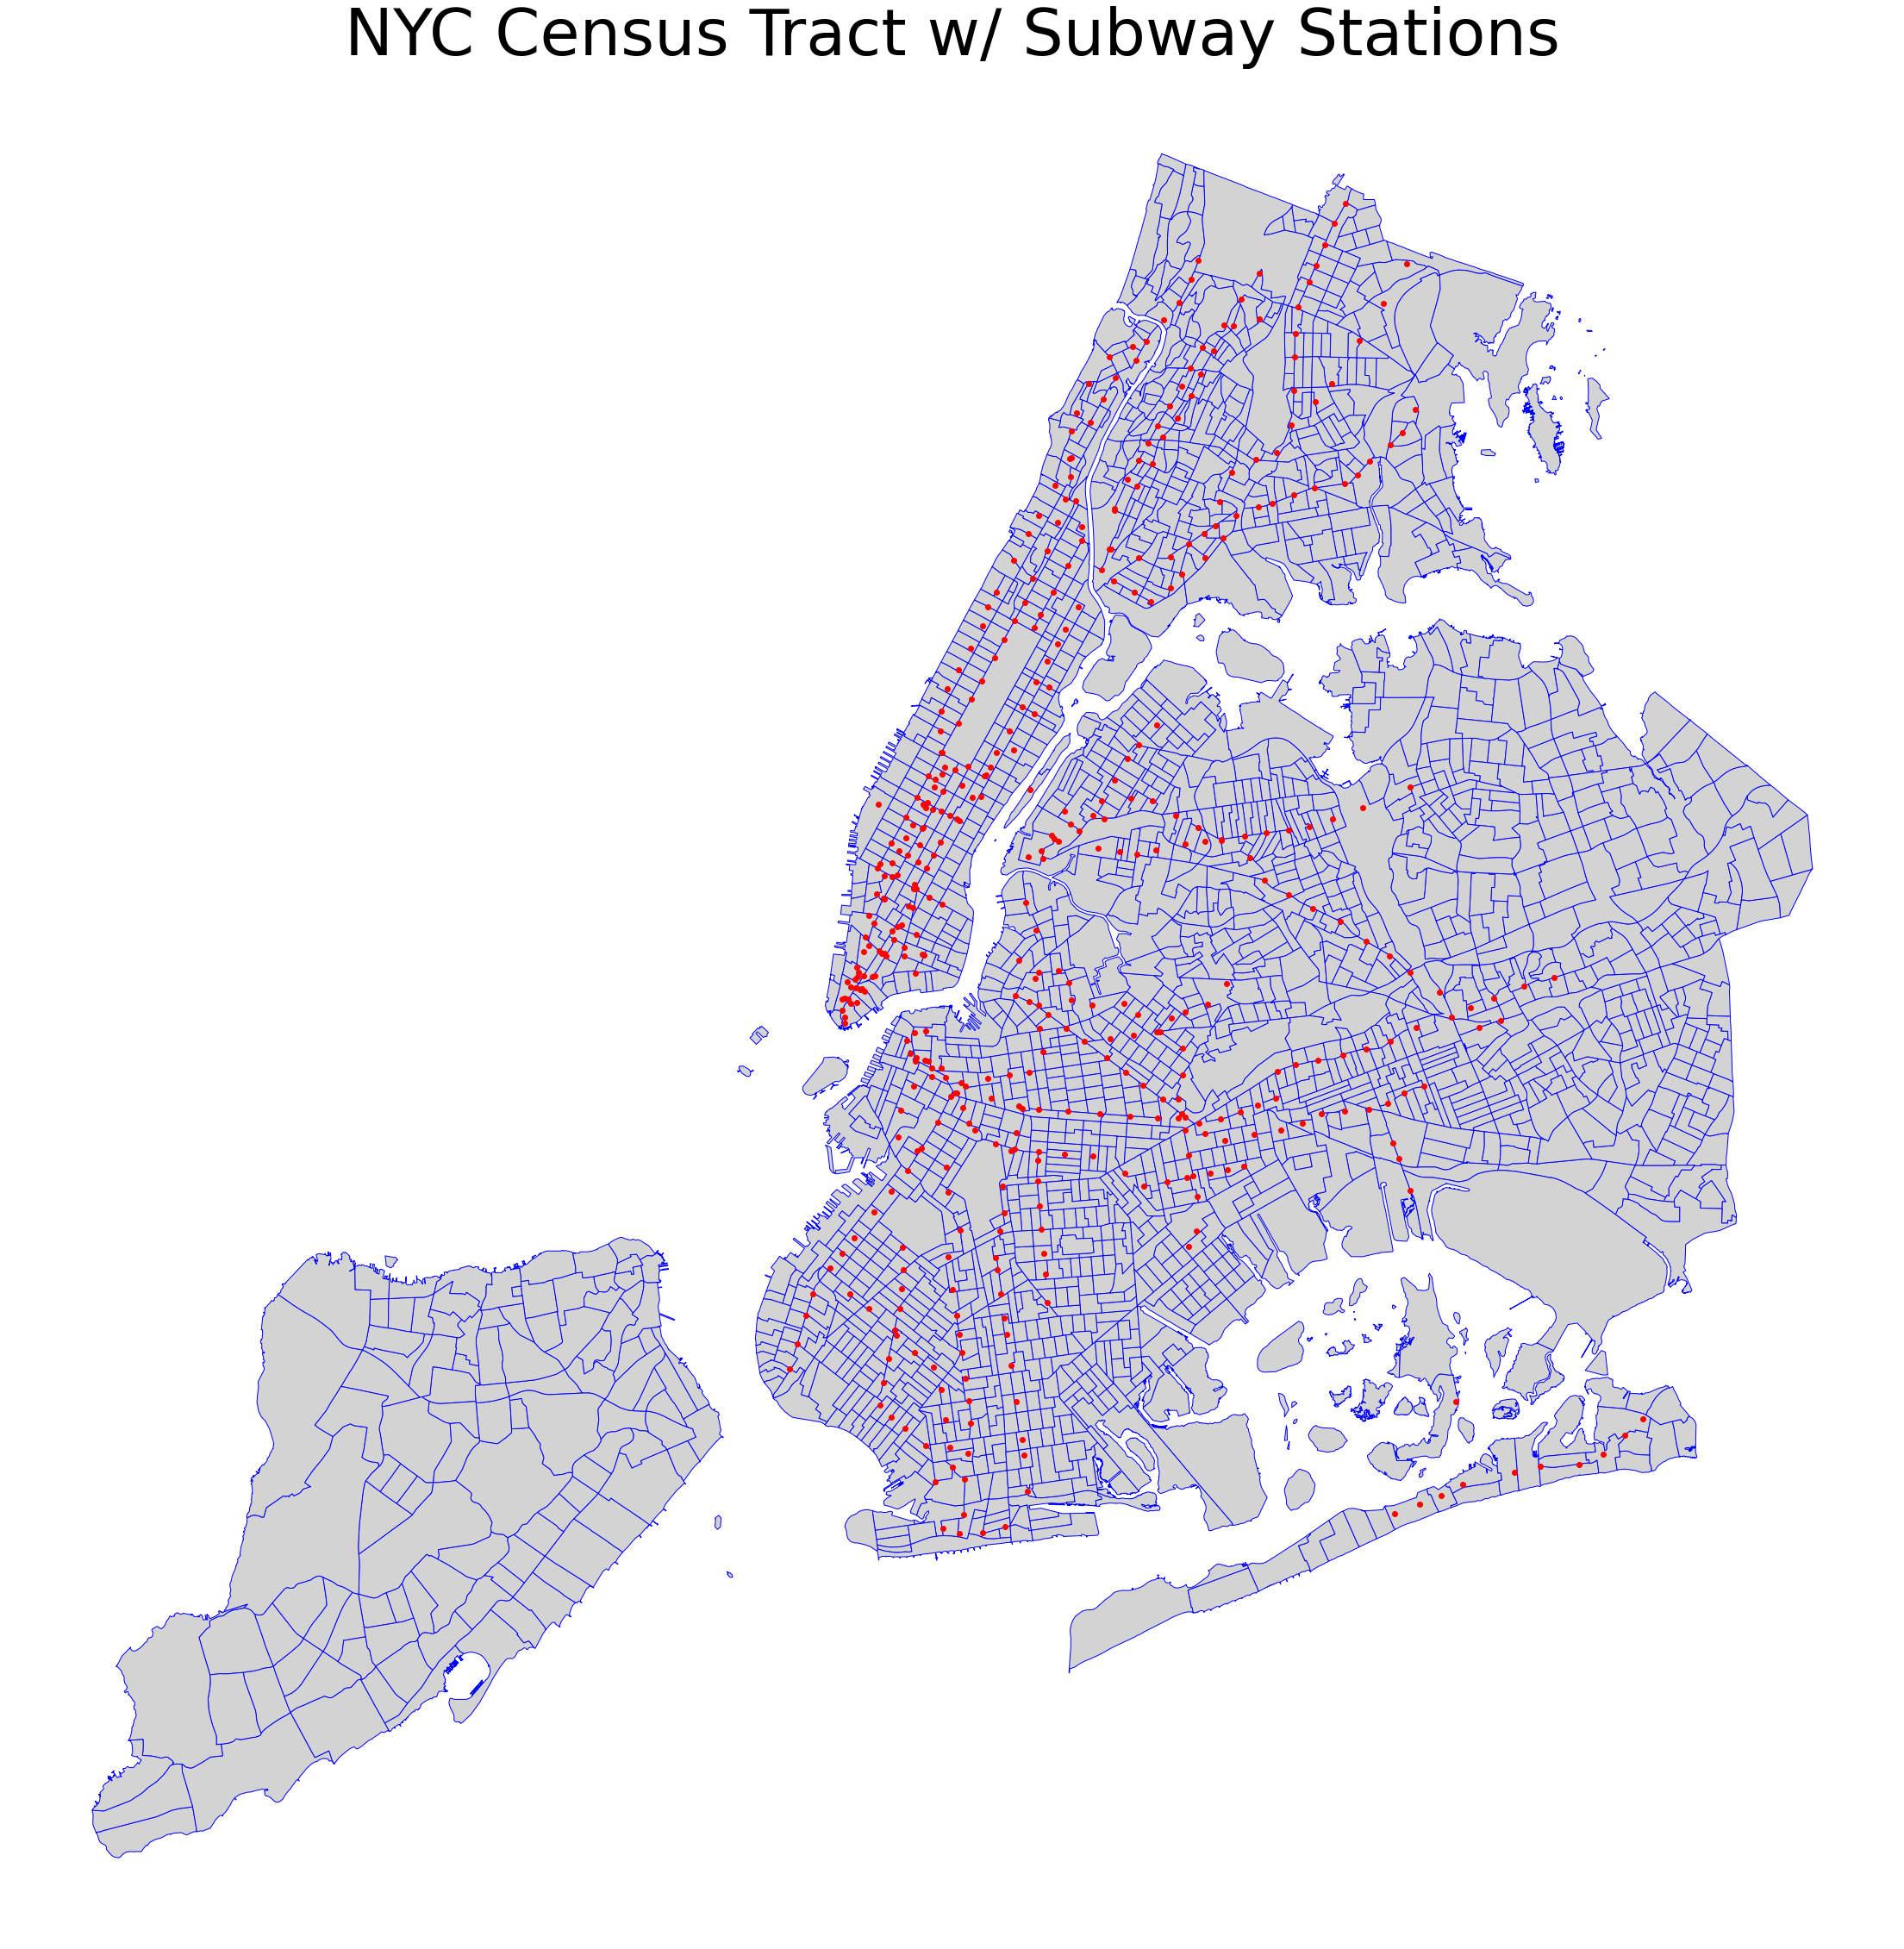

In [38]:
fig, ax = plt.subplots(figsize=(50,40))
ax = ct_gdf.plot(ax=ax, color='lightgray', edgecolor='b')
ax = station_gdf.plot(ax=ax, color='r')
ax.set_title(label="NYC Census Tract w/ Subway Stations", fontdict={'fontsize':75}, loc='center')
ax.set_axis_off()
plt.show()


### Import Pickeled Data

In [2]:
df = pd.read_pickle("./pickled/cleaned_data")
df

STATION,1 AV,103 ST,103 ST-CORONA,104 ST,110 ST,111 ST,116 ST,116 ST-COLUMBIA,121 ST,125 ST,...,WHITLOCK AV,WILSON AV,WINTHROP ST,WOODHAVEN BLVD,WOODLAWN,WORLD TRADE CTR,WTC-CORTLANDT,YORK ST,ZEREGA AV,TOTAL
DATE,,,,,,,,,,,,,,,,,,,,,
2021-01-02,3559.0,4694.0,6158.0,979.0,2115.0,4661.0,5677.0,693.0,550.0,13679.0,...,466.0,973.0,1074.0,5682.0,1816.0,161.0,1594.0,1.0,472.0,864360.0
2021-01-03,2415.0,3278.0,4571.0,647.0,1522.0,3387.0,3994.0,455.0,401.0,9582.0,...,337.0,724.0,842.0,3784.0,1130.0,59.0,648.0,2.0,354.0,578814.5
2021-01-04,5193.0,7801.0,9253.0,1800.0,3378.0,7114.0,8669.0,1921.0,903.0,21790.0,...,788.0,1429.0,2552.0,6347.5,2780.0,2309.0,1546.0,2129.0,918.0,1426146.0
2021-01-05,5333.0,8251.0,9794.0,1795.0,3630.0,7692.0,9119.0,1936.0,946.0,22314.0,...,819.0,1513.0,2677.0,8911.0,2926.0,2395.0,1492.0,2153.0,956.0,1472308.5
2021-01-06,5468.0,8467.0,9972.0,1832.0,3850.0,7622.0,9131.0,2021.0,938.0,21924.0,...,841.0,1528.0,2609.0,9127.0,2840.0,2403.0,1560.0,2202.0,932.0,1482079.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-08,5833.0,9097.0,9427.0,1952.0,3802.0,7169.0,10187.0,2131.0,1058.0,23662.0,...,818.0,1463.0,2887.0,8693.0,2841.0,2381.0,1641.0,2176.0,918.0,1525163.0
2021-03-09,6154.0,9570.0,9947.0,1943.0,4267.0,7642.0,10444.0,2172.0,998.0,25143.0,...,884.0,1650.0,2994.0,9338.0,3077.0,2565.0,1759.0,2418.0,979.0,1616116.0
2021-03-10,6021.0,9773.0,9926.0,1952.0,4190.0,7648.0,10768.0,2296.0,1111.0,24893.0,...,907.0,1570.0,2930.0,9329.0,3083.0,2493.0,1628.0,2374.0,976.0,1622137.0


# Plotting
### Total Entries - all stations summed
*what happened at the beginning of Feb??*

/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


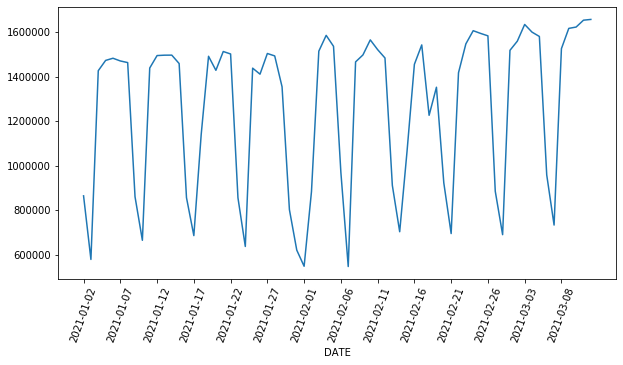

In [3]:
plt.figure(figsize=(10,5));
ax = sns.lineplot(df["TOTAL"].index, df["TOTAL"].values);
ax.set(xticks=[x for x in df.index.values if df.index.get_loc(x)%5==0]);
plt.xticks(rotation=70);



No handles with labels found to put in legend.


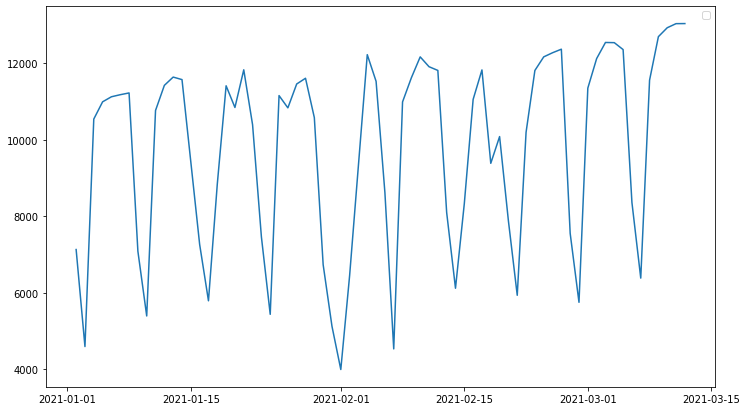

In [4]:
fig = plt.figure(figsize=(12,7))
plt.plot(df['14 ST'])
plt.legend(loc='best')
plt.show(block=False)

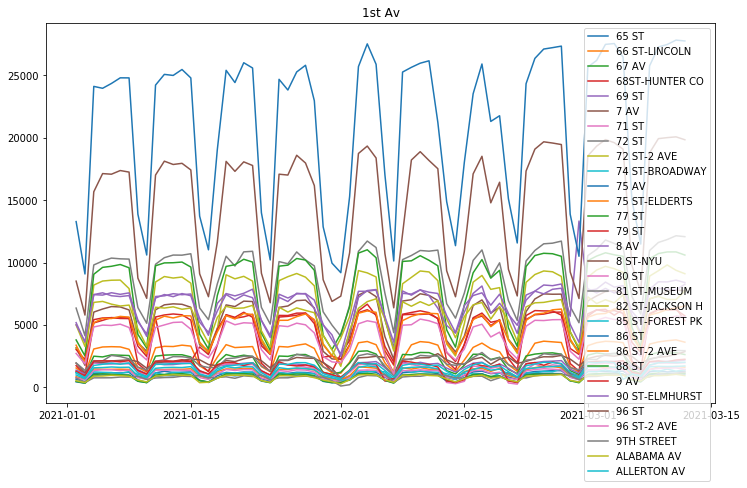

In [5]:
fig = plt.figure(figsize=(12,7))
for col in df.columns[90:120]:
    plt.plot(df[col], label=col)
plt.legend(loc='best')
plt.title('1st Av')
plt.show(block=False)

### Heavily Trafficked Stations

/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

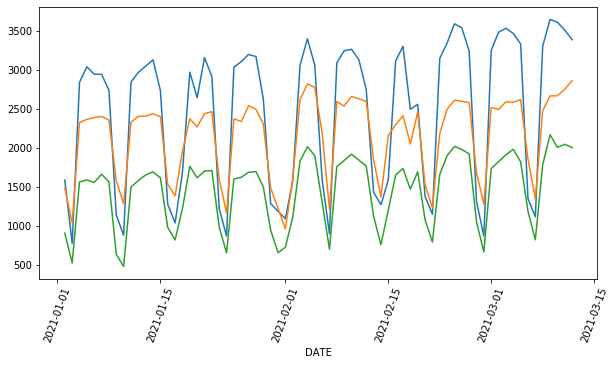

In [6]:
plt.figure(figsize=(10,5));
sns.lineplot(df["BROOKLYN BRIDGE"].index, df["BROOKLYN BRIDGE"].values);
plt.xticks(rotation=70);

sns.lineplot(df["BEDFORD-NOSTRAN"].index, df["BEDFORD-NOSTRAN"].values);
plt.xticks(rotation=70);



sns.lineplot(df["GRAND ARMY PLAZ"].index, df["GRAND ARMY PLAZ"].values);
plt.xticks(rotation=70);


/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/Khyatee/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result 

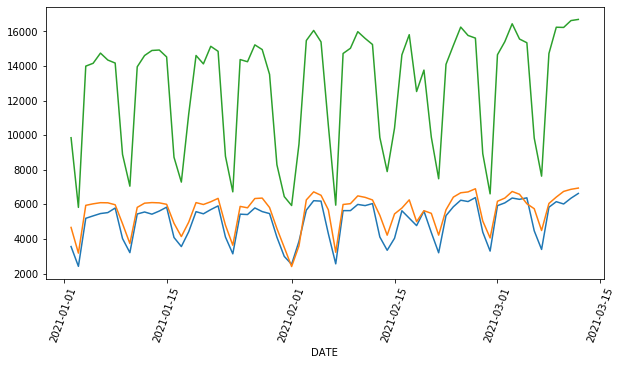

In [7]:
plt.figure(figsize=(10,5));
sns.lineplot(df["1 AV"].index, df["1 AV"].values);
plt.xticks(rotation=70);

sns.lineplot(df["DELANCEY/ESSEX"].index, df["DELANCEY/ESSEX"].values);
plt.xticks(rotation=70);

sns.lineplot(df["59 ST COLUMBUS"].index, df["59 ST COLUMBUS"].values);
plt.xticks(rotation=70);

### Histograms

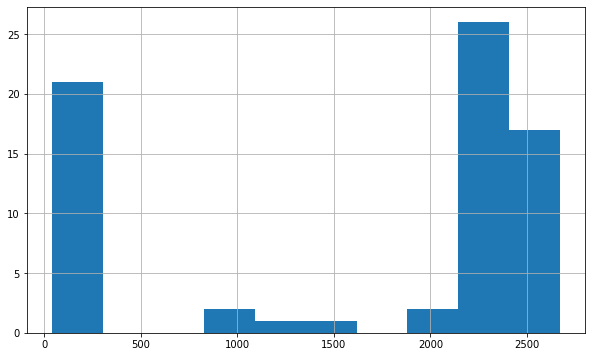

In [8]:
df['WORLD TRADE CTR'].hist(figsize = (10,6));

# Stationarity
A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time. Time series models work on the assumption that the time series are stationary
### Rolling Statistics
plot the moving average or moving variance and see if it varies with time

In [12]:
roll_mean = df["TOTAL"].rolling(window=8, center=False).mean()
roll_std = df["TOTAL"].rolling(window=8, center=False).std()

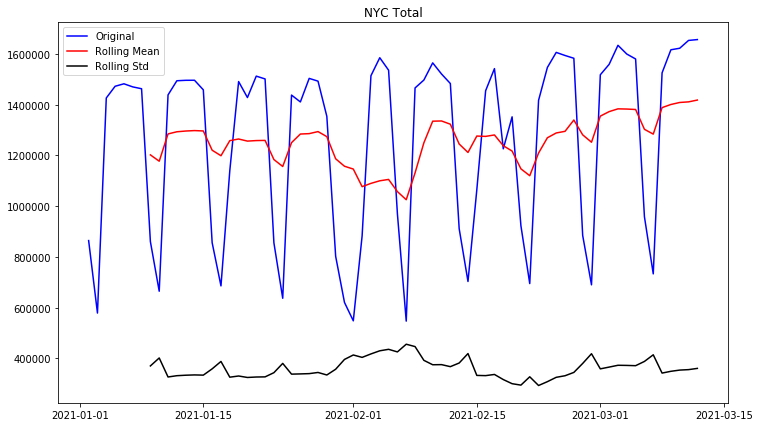

In [13]:
fig = plt.figure(figsize=(12,7))
plt.plot(df["TOTAL"], color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('NYC Total')
plt.show(block=False)

From visual inspection, the rolling mean and standard dev appear to be constant, which hints that the time series **is** stationary.

### Dickey Fuller Test
The null-hypothesis for the test is that the time series is not stationary. So if the test statistic is less than the critical value, we reject the null hypothesis and say that the series is stationary.

In [14]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(df["TOTAL"])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dftest)

print ('\nResults of Dickey-Fuller test: \n')

print(dfoutput)

(-1.625335935352384, 0.4699329991273909, 7, 62, {'1%': -3.540522678829176, '5%': -2.9094272025108254, '10%': -2.5923136524453696}, 1596.7582605465432)

Results of Dickey-Fuller test: 

Test Statistic                 -1.625336
p-value                         0.469933
#Lags Used                      7.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


This test fails to reject the null hypothesis, as the test statistic is less extreme than the critical value<br>**The time series is not stationary.**<br>*If the test statistic is more extreme in the direction of the alternative than the critical value, reject the null hypothesis in favor of the alternative hypothesis. If the test statistic is less extreme than the critical value, do not reject the null hypothesis.*